### Business Problem

Telecom Inc., an American telecomunications company, is competing with a an up-start company that has eaten into their majority market share in recent years. To re-gain their market share, Telecom Inc. must first address the issue of customer churn. Telecom Inc. needs a model to help them predict which of customers are likely to churn to they can intervene and save the accounts. They also want to know what factors contribute to churn so they can improve their service to prevent future churn.

To evaluate the preformance of their customer churn model, Telecom Inc. will use F1 score because the firm wants to  capture true positives but is also concerned about minimizing false negatives and false positives. False positives are costly because in cases where our model predicts a customer will churn, Telecom Inc. indtends to intervene with customer support and discounts. Given the class imbalence (81%), F1 score does a better job evaluating the true performance of our model.

#### To-do
- Address class imbalence with SMOTE. It’s important to generate the new samples only in the training set to ensure our model generalizes well to unseen data.
- Columns requiring dummy classification: ["state","area code","international plan","voice mail plan"]
- Scale numeric values

In [53]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv("Data/churn-in-telecoms-dataset.csv")

### 5. Identify relationships in your dataset
As you continue to understand your dataset, you can begin to pick out relationships in your dataset. Try to spot any correlations between values. Using scatter plots can make it easier to identify correlations and relationships between values. Be sure to take notes and pick out as many correlations as you can find. As you notice correlations, you can start thinking about why certain values might have correlations.

### 6. Locate any outliers in your dataset
Locating outliers in your dataset is another important step to conducting EDA. Outliers are values in your dataset that are significantly different from the rest of the values. Outliers can be much higher or lower than the other values in a dataset. It's important to identify outliers because they can skew the mean, median, mode or range of a dataset and alter the appearance of a visual representation. You can locate outliers by observing your graphs or sorting your data in numerical order during your EDA.

### 1. Initial Observations
- We have 3333 total entries which corresponds to the same number of unique customers
- We have 21 columns of data, all of which seem like they could be relevant to the target other than "phone number"
- We do have more states than area codes which is strange. My assumption as that these area codes are given to customers when they sign up for a plan but remain the same even if they move out of state.
- The data-set is limited to customers with area codes from the San Fransisco Bay area 

In [2]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer id             3333 non-null   int64  
 1   state                   3333 non-null   object 
 2   account length          3333 non-null   int64  
 3   area code               3333 non-null   int64  
 4   phone number            3333 non-null   object 
 5   international plan      3333 non-null   object 
 6   voice mail plan         3333 non-null   object 
 7   number vmail messages   3333 non-null   int64  
 8   total day minutes       3333 non-null   float64
 9   total day calls         3333 non-null   int64  
 10  total day charge        3333 non-null   float64
 11  total eve minutes       3333 non-null   float64
 12  total eve calls         3333 non-null   int64  
 13  total eve charge        3333 non-null   float64
 14  total night minutes     3333 non-null   

### 2. Find missing values
- We have no missing values

In [79]:
#We have no null values to contend with
df.isnull().sum()

customer id               0
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### 3. Categorize value types
- Each phone-number corresponds to a unique customer, we can think of this as an identifier. To make our identifier explict, I've added a customer id column

- Categorical columns requiring dummy classification: 
        ['state', 'area code', 'international plan','voice mail plan']
- Valid numeric columns: 
        ['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls']
- Continuous numeric columns: 
        ['total day minutes', 'total day charge', 'total eve minutes',
       'total eve charge', 'total night minutes', 'total night charge',
       'total intl minutes', 'total intl charge']

In [74]:
print(f'Unqique phone number: {len(df["phone number"].unique())}' )
print(f'Unique area codes: {len(df["area code"].unique())}' )
print(f'Unique states: {len(df["state"].unique())}' )
print(f'Unique int plan values: {len(df["international plan"].unique())}' )
print(f'Unique voice mail plan values: {len(df["voice mail plan"].unique())}' )
print(f'Unique number vmail messages values: {len(df["number vmail messages"].unique())}' )

Unqique phone number: 3333
Unique area codes: 3
Unique states: 51
Unique int plan values: 2
Unique voice mail plan values: 2
Unique number vmail messages values: 46


In [76]:
#Adding a column for customer-id and moving it to position 0 in our df
df['customer id'] = df.index
df = df[['customer id','state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn']]

In [86]:
df_categorical = df[['state', 'area code', 'international plan','voice mail plan']]
df_categorical

,state,area code,international plan,voice mail plan
0,KS,415,no,yes
1,OH,415,no,yes
2,NJ,415,no,no
3,OH,408,yes,no
4,OK,415,yes,no
...,...,...,...,...
3328,AZ,415,no,yes
3329,WV,415,no,no
3330,RI,510,no,no
3331,CT,510,yes,no


In [77]:
df_numeric = df.select_dtypes(include=["int64","float64"]).drop(columns=["customer id","area code"])
df_numeric

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [78]:
df.select_dtypes(include="float").columns

Index(['total day minutes', 'total day charge', 'total eve minutes',
       'total eve charge', 'total night minutes', 'total night charge',
       'total intl minutes', 'total intl charge'],
      dtype='object')

In [95]:
#Our categorical values look clean. We'll be one-hot encoding these values so we don't need to convert anything at this point.
#We do have more states than area codes which is strange. My assumption as that these area codes are given to customers when
#they sign up for a plan but remain the same even if they move out of state.
df_categorical.value_counts()

state  area code  international plan  voice mail plan
WV     415        no                  no                 39
NY     415        no                  no                 33
OR     415        no                  no                 31
VT     415        no                  no                 29
MN     415        no                  no                 29
                                                         ..
ME     415        yes                 no                  1
HI     510        yes                 no                  1
NM     510        yes                 no                  1
       415        yes                 no                  1
       408        yes                 no                  1
Length: 485, dtype: int64

### 4. Shape of dataset
- Our target variable "churn" is imbalanced with 85% of values equal to "False"
- 

In [21]:
#Our target variable "churn" is imbalanced. We will need to address this with SMOTE later on.
df.churn.value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

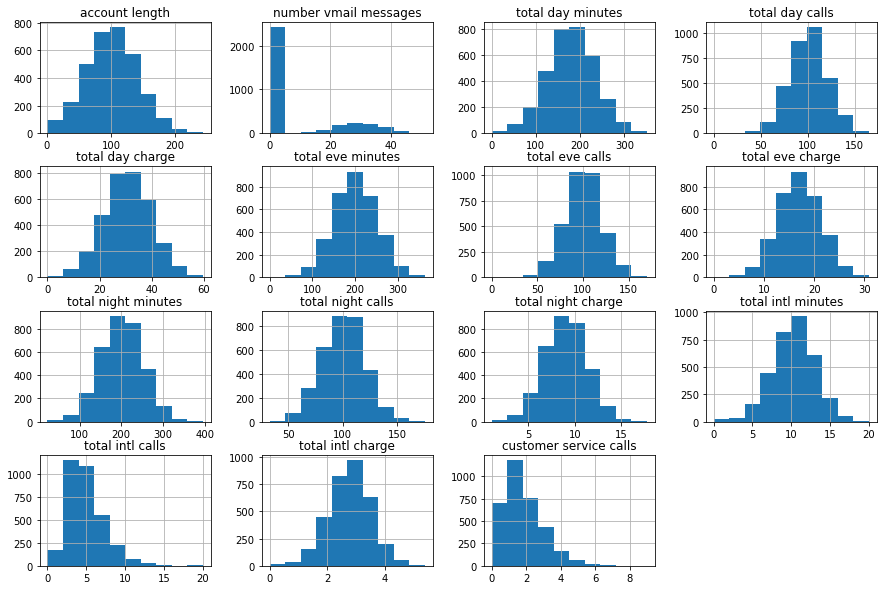

In [59]:
df_numeric.hist(figsize=(15, 10));

state  area code  international plan  voice mail plan
WV     415        no                  no                 39
NY     415        no                  no                 33
OR     415        no                  no                 31
VT     415        no                  no                 29
MN     415        no                  no                 29
                                                         ..
ME     415        yes                 no                  1
HI     510        yes                 no                  1
NM     510        yes                 no                  1
       415        yes                 no                  1
       408        yes                 no                  1
Length: 485, dtype: int64

In [84]:
#Users with no voice mail plan are not able to recieve voice mails thus have zero voicemails
df[df["voice mail plan"] == "no"].describe()

,customer id,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,2411.000000,2411.000000,2411.000000,2411.0,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000,2411.000000
mean,1674.386562,100.992949,437.201991,0.0,179.831813,100.573206,30.571958,200.304770,100.193696,17.026080,200.681958,99.919535,9.030792,10.239569,4.467856,2.765176,1.577354
std,963.138707,40.224654,42.426684,0.0,54.906108,20.202397,9.333985,50.923573,19.972580,4.328471,50.181165,19.570348,2.258184,2.789161,2.434559,0.753068,1.313562
min,2.000000,1.000000,408.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,849.500000,74.000000,408.000000,0.0,143.700000,87.000000,24.430000,165.950000,87.000000,14.105000,167.800000,86.000000,7.550000,8.500000,3.000000,2.300000,1.000000
50%,1691.000000,100.000000,415.000000,0.0,179.200000,101.000000,30.460000,200.200000,100.000000,17.020000,201.000000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,2510.500000,127.000000,510.000000,0.0,216.450000,114.000000,36.795000,234.150000,114.000000,19.905000,234.400000,113.000000,10.545000,12.100000,6.000000,3.270000,2.000000
max,3331.000000,243.000000,510.000000,0.0,350.800000,165.000000,59.640000,363.700000,168.000000,30.910000,395.000000,166.000000,17.770000,18.900000,19.000000,5.100000,9.000000
